In [3]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier as ADC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression as LR
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import BallTree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV as GSearch

from imblearn.under_sampling import RandomUnderSampler 

In [4]:
airline_df = pd.read_csv('./data/airline_data.csv')
airline_df.dropna(inplace=True)
airline_df.reset_index(drop=True, inplace=True)
airline_df = pd.get_dummies(airline_df, prefix = None, prefix_sep = '_', dummy_na = False, columns = ['satisfaction','Gender', 'Customer Type', 'Type of Travel', 'Class'], sparse = False, drop_first = False, dtype = None)
columns_drop = ['id', 'Unnamed: 0.1', 'Unnamed: 0', 'satisfaction_neutral or dissatisfied']
airline_df.drop(columns_drop, axis=1, inplace = True)


In [5]:
airline_df.isnull().sum()

Age                                  0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction_satisfied               0
Gender_Female                        0
Gender_Male                          0
Customer Type_Loyal Customer         0
Customer Type_disloyal Customer      0
Type of Travel_Business travel       0
Type of Travel_Personal Travel       0
Class_Business           

In [6]:
airline_df.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction_satisfied', 'Gender_Female', 'Gender_Male',
       'Customer Type_Loyal Customer', 'Customer Type_disloyal Customer',
       'Type of Travel_Business travel', 'Type of Travel_Personal Travel',
       'Class_Business', 'Class_Eco', 'Class_Eco Plus'],
      dtype='object')

In [7]:
airline_df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction_satisfied,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,0,0,1,1,0,0,1,0,0,1
1,25,235,3,2,3,3,1,3,1,1,...,0,0,1,0,1,1,0,1,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,1,1,0,1,0,1,0,1,0,0
3,25,562,2,5,5,5,2,2,2,2,...,0,1,0,1,0,1,0,1,0,0
4,61,214,3,3,3,3,4,5,5,3,...,1,0,1,1,0,1,0,1,0,0


In [8]:

airline_df.dropna(inplace=True)
airline_df.reset_index(drop=True, inplace=True)

In [9]:
reduced_df = airline_df.sample(frac=0.10, random_state=42)
reduced_df.shape

(12949, 28)

In [10]:
reduced_df.satisfaction_satisfied.value_counts()

0    7323
1    5626
Name: satisfaction_satisfied, dtype: int64

In [11]:
target = reduced_df['satisfaction_satisfied']

In [12]:
input_columns = reduced_df.loc[:, airline_df.columns != "satisfaction_satisfied"]

In [13]:
input_columns.shape

(12949, 27)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(input_columns, target, stratify=target, train_size=0.8)

In [22]:
SGD_model = SGDClassifier()

param_grid = {'loss': ["hinge", "log_loss", "modified_huber", "squared_hinge", "perceptron"],  
              'penalty': ["l2", "l1", "elasticnet"], 
              'max_iter':[1000, 10000, 30000],
              'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]}  
   
grid = GridSearchCV(SGD_model, param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
grid.fit(x_train, y_train) 
 
print(grid.best_params_) 

# Ivan 

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


[CV 1/5] END alpha=0.0001, loss=hinge, max_iter=1000, penalty=l2;, score=0.787 total time=   0.2s
[CV 3/5] END alpha=0.0001, loss=hinge, max_iter=1000, penalty=l2;, score=0.602 total time=   0.2s
[CV 5/5] END alpha=0.0001, loss=hinge, max_iter=1000, penalty=l2;, score=0.495 total time=   0.3s
[CV 2/5] END alpha=0.0001, loss=hinge, max_iter=1000, penalty=l1;, score=0.771 total time=   0.4s
[CV 4/5] END alpha=0.0001, loss=hinge, max_iter=1000, penalty=l1;, score=0.802 total time=   0.3s
[CV 1/5] END alpha=0.0001, loss=hinge, max_iter=1000, penalty=elasticnet;, score=0.502 total time=   0.5s
[CV 3/5] END alpha=0.0001, loss=hinge, max_iter=1000, penalty=elasticnet;, score=0.826 total time=   0.5s
[CV 1/5] END alpha=0.0001, loss=hinge, max_iter=10000, penalty=l2;, score=0.554 total time=   0.3s
[CV 2/5] END alpha=0.0001, loss=hinge, max_iter=10000, penalty=l2;, score=0.535 total time=   0.2s
[CV 3/5] END alpha=0.0001, loss=hinge, max_iter=10000, penalty=l2;, score=0.737 total time=   0.2s
[

[CV 2/5] END alpha=0.0001, loss=hinge, max_iter=1000, penalty=l2;, score=0.809 total time=   0.3s
[CV 4/5] END alpha=0.0001, loss=hinge, max_iter=1000, penalty=l2;, score=0.571 total time=   0.3s
[CV 1/5] END alpha=0.0001, loss=hinge, max_iter=1000, penalty=l1;, score=0.800 total time=   0.4s
[CV 3/5] END alpha=0.0001, loss=hinge, max_iter=1000, penalty=l1;, score=0.782 total time=   0.3s
[CV 5/5] END alpha=0.0001, loss=hinge, max_iter=1000, penalty=l1;, score=0.778 total time=   0.3s
[CV 2/5] END alpha=0.0001, loss=hinge, max_iter=1000, penalty=elasticnet;, score=0.712 total time=   0.3s
[CV 4/5] END alpha=0.0001, loss=hinge, max_iter=1000, penalty=elasticnet;, score=0.573 total time=   0.4s
[CV 5/5] END alpha=0.0001, loss=hinge, max_iter=1000, penalty=elasticnet;, score=0.775 total time=   0.6s
[CV 4/5] END alpha=0.0001, loss=hinge, max_iter=10000, penalty=l2;, score=0.546 total time=   0.1s
[CV 5/5] END alpha=0.0001, loss=hinge, max_iter=10000, penalty=l2;, score=0.782 total time=  

[CV 5/5] END alpha=0.0001, loss=squared_hinge, max_iter=1000, penalty=elasticnet;, score=0.801 total time=   0.4s
[CV 2/5] END alpha=0.0001, loss=squared_hinge, max_iter=10000, penalty=l2;, score=0.572 total time=   0.1s
[CV 4/5] END alpha=0.0001, loss=squared_hinge, max_iter=10000, penalty=l2;, score=0.655 total time=   0.2s
[CV 1/5] END alpha=0.0001, loss=squared_hinge, max_iter=10000, penalty=l1;, score=0.723 total time=   0.4s
[CV 3/5] END alpha=0.0001, loss=squared_hinge, max_iter=10000, penalty=l1;, score=0.707 total time=   0.3s
[CV 5/5] END alpha=0.0001, loss=squared_hinge, max_iter=10000, penalty=l1;, score=0.790 total time=   0.4s
[CV 2/5] END alpha=0.0001, loss=squared_hinge, max_iter=10000, penalty=elasticnet;, score=0.763 total time=   0.5s
[CV 4/5] END alpha=0.0001, loss=squared_hinge, max_iter=10000, penalty=elasticnet;, score=0.707 total time=   0.3s
[CV 5/5] END alpha=0.0001, loss=squared_hinge, max_iter=10000, penalty=elasticnet;, score=0.813 total time=   0.4s
[CV 4/

[CV 2/5] END alpha=0.001, loss=log_loss, max_iter=30000, penalty=elasticnet;, score=0.846 total time=   0.4s
[CV 4/5] END alpha=0.001, loss=log_loss, max_iter=30000, penalty=elasticnet;, score=0.855 total time=   0.6s
[CV 2/5] END alpha=0.001, loss=modified_huber, max_iter=1000, penalty=l2;, score=0.579 total time=   0.1s
[CV 3/5] END alpha=0.001, loss=modified_huber, max_iter=1000, penalty=l2;, score=0.753 total time=   0.3s
[CV 5/5] END alpha=0.001, loss=modified_huber, max_iter=1000, penalty=l2;, score=0.772 total time=   0.2s
[CV 2/5] END alpha=0.001, loss=modified_huber, max_iter=1000, penalty=l1;, score=0.778 total time=   0.5s
[CV 4/5] END alpha=0.001, loss=modified_huber, max_iter=1000, penalty=l1;, score=0.797 total time=   0.3s
[CV 1/5] END alpha=0.001, loss=modified_huber, max_iter=1000, penalty=elasticnet;, score=0.843 total time=   0.4s
[CV 3/5] END alpha=0.001, loss=modified_huber, max_iter=1000, penalty=elasticnet;, score=0.794 total time=   0.3s
[CV 4/5] END alpha=0.001

[CV 1/5] END alpha=0.001, loss=log_loss, max_iter=30000, penalty=elasticnet;, score=0.857 total time=   0.5s
[CV 3/5] END alpha=0.001, loss=log_loss, max_iter=30000, penalty=elasticnet;, score=0.463 total time=   0.4s
[CV 5/5] END alpha=0.001, loss=log_loss, max_iter=30000, penalty=elasticnet;, score=0.847 total time=   0.3s
[CV 1/5] END alpha=0.001, loss=modified_huber, max_iter=1000, penalty=l2;, score=0.774 total time=   0.2s
[CV 4/5] END alpha=0.001, loss=modified_huber, max_iter=1000, penalty=l2;, score=0.582 total time=   0.3s
[CV 1/5] END alpha=0.001, loss=modified_huber, max_iter=1000, penalty=l1;, score=0.807 total time=   0.5s
[CV 3/5] END alpha=0.001, loss=modified_huber, max_iter=1000, penalty=l1;, score=0.788 total time=   0.5s
[CV 5/5] END alpha=0.001, loss=modified_huber, max_iter=1000, penalty=l1;, score=0.789 total time=   0.3s
[CV 2/5] END alpha=0.001, loss=modified_huber, max_iter=1000, penalty=elasticnet;, score=0.785 total time=   0.4s
[CV 5/5] END alpha=0.001, los

[CV 5/5] END alpha=0.01, loss=hinge, max_iter=1000, penalty=elasticnet;, score=0.851 total time=   0.2s
[CV 2/5] END alpha=0.01, loss=hinge, max_iter=10000, penalty=l2;, score=0.628 total time=   0.2s
[CV 4/5] END alpha=0.01, loss=hinge, max_iter=10000, penalty=l2;, score=0.641 total time=   0.1s
[CV 5/5] END alpha=0.01, loss=hinge, max_iter=10000, penalty=l2;, score=0.519 total time=   0.2s
[CV 2/5] END alpha=0.01, loss=hinge, max_iter=10000, penalty=l1;, score=0.769 total time=   0.1s
[CV 4/5] END alpha=0.01, loss=hinge, max_iter=10000, penalty=l1;, score=0.798 total time=   0.1s
[CV 1/5] END alpha=0.01, loss=hinge, max_iter=10000, penalty=elasticnet;, score=0.641 total time=   0.2s
[CV 3/5] END alpha=0.01, loss=hinge, max_iter=10000, penalty=elasticnet;, score=0.614 total time=   0.2s
[CV 5/5] END alpha=0.01, loss=hinge, max_iter=10000, penalty=elasticnet;, score=0.737 total time=   0.1s
[CV 2/5] END alpha=0.01, loss=hinge, max_iter=30000, penalty=l2;, score=0.624 total time=   0.2s

[CV 2/5] END alpha=0.01, loss=hinge, max_iter=1000, penalty=elasticnet;, score=0.462 total time=   0.2s
[CV 4/5] END alpha=0.01, loss=hinge, max_iter=1000, penalty=elasticnet;, score=0.446 total time=   0.1s
[CV 1/5] END alpha=0.01, loss=hinge, max_iter=10000, penalty=l2;, score=0.519 total time=   0.2s
[CV 3/5] END alpha=0.01, loss=hinge, max_iter=10000, penalty=l2;, score=0.611 total time=   0.2s
[CV 1/5] END alpha=0.01, loss=hinge, max_iter=10000, penalty=l1;, score=0.804 total time=   0.1s
[CV 3/5] END alpha=0.01, loss=hinge, max_iter=10000, penalty=l1;, score=0.775 total time=   0.2s
[CV 5/5] END alpha=0.01, loss=hinge, max_iter=10000, penalty=l1;, score=0.764 total time=   0.2s
[CV 2/5] END alpha=0.01, loss=hinge, max_iter=10000, penalty=elasticnet;, score=0.644 total time=   0.2s
[CV 4/5] END alpha=0.01, loss=hinge, max_iter=10000, penalty=elasticnet;, score=0.847 total time=   0.2s
[CV 1/5] END alpha=0.01, loss=hinge, max_iter=30000, penalty=l2;, score=0.596 total time=   0.1s


[CV 3/5] END alpha=0.01, loss=squared_hinge, max_iter=30000, penalty=l2;, score=0.472 total time=   0.2s
[CV 5/5] END alpha=0.01, loss=squared_hinge, max_iter=30000, penalty=l2;, score=0.577 total time=   0.2s
[CV 2/5] END alpha=0.01, loss=squared_hinge, max_iter=30000, penalty=l1;, score=0.755 total time=   0.4s
[CV 4/5] END alpha=0.01, loss=squared_hinge, max_iter=30000, penalty=l1;, score=0.755 total time=   0.3s
[CV 1/5] END alpha=0.01, loss=squared_hinge, max_iter=30000, penalty=elasticnet;, score=0.558 total time=   0.3s
[CV 3/5] END alpha=0.01, loss=squared_hinge, max_iter=30000, penalty=elasticnet;, score=0.527 total time=   0.4s
[CV 5/5] END alpha=0.01, loss=squared_hinge, max_iter=30000, penalty=elasticnet;, score=0.573 total time=   0.6s
[CV 3/5] END alpha=0.01, loss=perceptron, max_iter=1000, penalty=l2;, score=0.480 total time=   0.2s
[CV 5/5] END alpha=0.01, loss=perceptron, max_iter=1000, penalty=l2;, score=0.588 total time=   0.2s
[CV 2/5] END alpha=0.01, loss=perceptro

[CV 1/5] END alpha=0.01, loss=squared_hinge, max_iter=30000, penalty=l1;, score=0.745 total time=   0.4s
[CV 3/5] END alpha=0.01, loss=squared_hinge, max_iter=30000, penalty=l1;, score=0.770 total time=   0.3s
[CV 5/5] END alpha=0.01, loss=squared_hinge, max_iter=30000, penalty=l1;, score=0.707 total time=   0.3s
[CV 2/5] END alpha=0.01, loss=squared_hinge, max_iter=30000, penalty=elasticnet;, score=0.741 total time=   0.4s
[CV 4/5] END alpha=0.01, loss=squared_hinge, max_iter=30000, penalty=elasticnet;, score=0.516 total time=   0.3s
[CV 1/5] END alpha=0.01, loss=perceptron, max_iter=1000, penalty=l2;, score=0.529 total time=   0.2s
[CV 2/5] END alpha=0.01, loss=perceptron, max_iter=1000, penalty=l2;, score=0.819 total time=   0.2s
[CV 4/5] END alpha=0.01, loss=perceptron, max_iter=1000, penalty=l2;, score=0.688 total time=   0.2s
[CV 1/5] END alpha=0.01, loss=perceptron, max_iter=1000, penalty=l1;, score=0.793 total time=   0.1s
[CV 3/5] END alpha=0.01, loss=perceptron, max_iter=1000

[CV 3/5] END alpha=0.1, loss=modified_huber, max_iter=1000, penalty=elasticnet;, score=0.445 total time=   0.1s
[CV 4/5] END alpha=0.1, loss=modified_huber, max_iter=1000, penalty=elasticnet;, score=0.529 total time=   0.1s
[CV 1/5] END alpha=0.1, loss=modified_huber, max_iter=10000, penalty=l2;, score=0.549 total time=   0.2s
[CV 3/5] END alpha=0.1, loss=modified_huber, max_iter=10000, penalty=l2;, score=0.582 total time=   0.2s
[CV 4/5] END alpha=0.1, loss=modified_huber, max_iter=10000, penalty=l2;, score=0.496 total time=   0.2s
[CV 1/5] END alpha=0.1, loss=modified_huber, max_iter=10000, penalty=l1;, score=0.782 total time=   0.1s
[CV 4/5] END alpha=0.1, loss=modified_huber, max_iter=10000, penalty=l1;, score=0.768 total time=   0.3s
[CV 1/5] END alpha=0.1, loss=modified_huber, max_iter=10000, penalty=elasticnet;, score=0.487 total time=   0.3s
[CV 2/5] END alpha=0.1, loss=modified_huber, max_iter=10000, penalty=elasticnet;, score=0.725 total time=   0.2s
[CV 3/5] END alpha=0.1, l

[CV 2/5] END alpha=0.1, loss=modified_huber, max_iter=10000, penalty=l2;, score=0.821 total time=   0.2s
[CV 5/5] END alpha=0.1, loss=modified_huber, max_iter=10000, penalty=l2;, score=0.634 total time=   0.2s
[CV 2/5] END alpha=0.1, loss=modified_huber, max_iter=10000, penalty=l1;, score=0.747 total time=   0.1s
[CV 3/5] END alpha=0.1, loss=modified_huber, max_iter=10000, penalty=l1;, score=0.805 total time=   0.2s
[CV 5/5] END alpha=0.1, loss=modified_huber, max_iter=10000, penalty=l1;, score=0.747 total time=   0.6s
[CV 4/5] END alpha=0.1, loss=modified_huber, max_iter=10000, penalty=elasticnet;, score=0.642 total time=   0.1s
[CV 5/5] END alpha=0.1, loss=modified_huber, max_iter=10000, penalty=elasticnet;, score=0.698 total time=   0.1s
[CV 2/5] END alpha=0.1, loss=modified_huber, max_iter=30000, penalty=l2;, score=0.579 total time=   0.2s
[CV 4/5] END alpha=0.1, loss=modified_huber, max_iter=30000, penalty=l2;, score=0.504 total time=   0.2s
[CV 1/5] END alpha=0.1, loss=modified_h

[CV 3/5] END alpha=1.0, loss=hinge, max_iter=10000, penalty=elasticnet;, score=0.566 total time=   0.2s
[CV 4/5] END alpha=1.0, loss=hinge, max_iter=10000, penalty=elasticnet;, score=0.600 total time=   0.3s
[CV 5/5] END alpha=1.0, loss=hinge, max_iter=10000, penalty=elasticnet;, score=0.565 total time=   0.2s
[CV 1/5] END alpha=1.0, loss=hinge, max_iter=30000, penalty=l2;, score=0.669 total time=   0.2s
[CV 2/5] END alpha=1.0, loss=hinge, max_iter=30000, penalty=l2;, score=0.572 total time=   0.2s
[CV 3/5] END alpha=1.0, loss=hinge, max_iter=30000, penalty=l2;, score=0.716 total time=   0.2s
[CV 4/5] END alpha=1.0, loss=hinge, max_iter=30000, penalty=l2;, score=0.735 total time=   0.2s
[CV 5/5] END alpha=1.0, loss=hinge, max_iter=30000, penalty=l2;, score=0.575 total time=   0.2s
[CV 1/5] END alpha=1.0, loss=hinge, max_iter=30000, penalty=l1;, score=0.580 total time=   0.2s
[CV 2/5] END alpha=1.0, loss=hinge, max_iter=30000, penalty=l1;, score=0.566 total time=   0.3s
[CV 3/5] END alp

{'alpha': 0.001, 'loss': 'log_loss', 'max_iter': 10000, 'penalty': 'elasticnet'}


R:  0.8787878787878788
P:  0.8925090252707581
A:  0.9013437331068036
F:  0.8855953073926477


<AxesSubplot:>

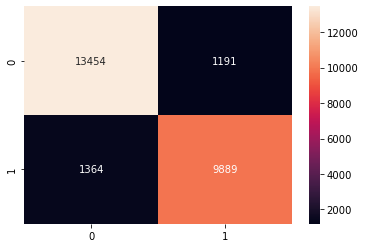

In [103]:
NB_model = CategoricalNB(alpha = 3)

NB_model.fit(x_train, y_train)

NB_hat = NB_model.predict(x_test)

recall = sklearn.metrics.recall_score(y_test,NB_hat)
precision = sklearn.metrics.precision_score(y_test, NB_hat)
accuracy = sklearn.metrics.accuracy_score(y_test, NB_hat)
f_measure = sklearn.metrics.f1_score(y_test, NB_hat)
print("R: ", recall)
print("P: ", precision)
print("A: ", accuracy)
print("F: ", f_measure)

sns.heatmap(confusion_matrix(y_test, NB_hat), annot=True, fmt='g')

# Ivan

**Categorical Naive Bayes**

The categorical Naive Bayes model works using the Bayes Theorem, which assumes that individual features are independent on each other, which works well with our dataset, as we can see through our correlation matrix that none of our features are very correlated. Applying the Bayes Theorem assigns a probability to each feature in the dataset, then uses those probabilities to predict a whole outcome. The categorical Native Bayes model works best for categorical data, which works well with our dataset, as we have a lot of categorical data in the form of 1\-5 ratings for the airline's performance.



In [35]:
#Neural_model = MLPClassifier(solver='lbfgs', alpha=0.1, hidden_layer_sizes=(20, 20), random_state=1)

#Neural_model.fit(x_train, y_train)

#Neural_hat = Neural_model.predict(x_test)

#precision = sklearn.metrics.precision_score(y_test, Neural_hat)
#accuracy = sklearn.metrics.accuracy_score(y_test, Neural_hat)
#print("P: ", precision)
#print("A: ", accuracy)

#sns.heatmap(confusion_matrix(y_test, Neural_hat), annot=True, fmt='g')

In [16]:
RF_model = RandomForestClassifier()

param_grid = {'n_estimators': [5, 10, 15, 20, 25, 30],  
              'criterion': ["gini", "entropy", "log_loss"], 
              'ccp_alpha':[0.0, 0.2, 0.4, 0.6, 0.8, 1.0],
              'bootstrap': [True, False]}  
   
grid = GridSearchCV(RF_model, param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
grid.fit(x_train, y_train) 
 
print(grid.best_params_) 



Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[CV 2/5] END bootstrap=True, ccp_alpha=0.0, criterion=gini, n_estimators=5;, score=0.929 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0.0, criterion=gini, n_estimators=5;, score=0.936 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0.0, criterion=gini, n_estimators=5;, score=0.927 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0.0, criterion=gini, n_estimators=10;, score=0.937 total time=   0.3s
[CV 4/5] END bootstrap=True, ccp_alpha=0.0, criterion=gini, n_estimators=10;, score=0.946 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0.0, criterion=gini, n_estimators=15;, score=0.941 total time=   0.2s
[CV 3/5] END bootstrap=True, ccp_alpha=0.0, criterion=gini, n_estimators=15;, score=0.948 total time=   0.2s
[CV 5/5] END bootstrap=True, ccp_alpha=0.0, criterion=gini, n_estimators=15;, score=0.949 total time=   0.2s
[CV 2/5] END bootstrap=True, ccp_alpha=0.0, criterion=gini, n_estimators=20;, score=0.938 total time=   0.3s
[CV 4/5] END bootstrap

[CV 1/5] END bootstrap=True, ccp_alpha=0.0, criterion=gini, n_estimators=5;, score=0.935 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.0, criterion=gini, n_estimators=5;, score=0.941 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0.0, criterion=gini, n_estimators=10;, score=0.943 total time=   0.3s
[CV 3/5] END bootstrap=True, ccp_alpha=0.0, criterion=gini, n_estimators=10;, score=0.943 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0.0, criterion=gini, n_estimators=10;, score=0.935 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0.0, criterion=gini, n_estimators=15;, score=0.936 total time=   0.2s
[CV 4/5] END bootstrap=True, ccp_alpha=0.0, criterion=gini, n_estimators=15;, score=0.944 total time=   0.2s
[CV 1/5] END bootstrap=True, ccp_alpha=0.0, criterion=gini, n_estimators=20;, score=0.938 total time=   0.2s
[CV 3/5] END bootstrap=True, ccp_alpha=0.0, criterion=gini, n_estimators=20;, score=0.946 total time=   0.3s
[CV 5/5] END bootstra

[CV 1/5] END bootstrap=True, ccp_alpha=0.2, criterion=log_loss, n_estimators=5;, score=0.566 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0.2, criterion=log_loss, n_estimators=5;, score=0.813 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0.2, criterion=log_loss, n_estimators=5;, score=0.776 total time=   0.2s
[CV 5/5] END bootstrap=True, ccp_alpha=0.2, criterion=log_loss, n_estimators=5;, score=0.565 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0.2, criterion=log_loss, n_estimators=10;, score=0.778 total time=   0.2s
[CV 4/5] END bootstrap=True, ccp_alpha=0.2, criterion=log_loss, n_estimators=10;, score=0.565 total time=   0.2s
[CV 1/5] END bootstrap=True, ccp_alpha=0.2, criterion=log_loss, n_estimators=15;, score=0.816 total time=   0.2s
[CV 3/5] END bootstrap=True, ccp_alpha=0.2, criterion=log_loss, n_estimators=15;, score=0.566 total time=   0.2s
[CV 5/5] END bootstrap=True, ccp_alpha=0.2, criterion=log_loss, n_estimators=15;, score=0.824 total 


[CV 1/5] END bootstrap=True, ccp_alpha=0.2, criterion=entropy, n_estimators=30;, score=0.566 total time=   0.4s
[CV 3/5] END bootstrap=True, ccp_alpha=0.2, criterion=entropy, n_estimators=30;, score=0.795 total time=   0.5s
[CV 5/5] END bootstrap=True, ccp_alpha=0.2, criterion=entropy, n_estimators=30;, score=0.824 total time=   0.5s
[CV 4/5] END bootstrap=True, ccp_alpha=0.2, criterion=log_loss, n_estimators=5;, score=0.784 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0.2, criterion=log_loss, n_estimators=10;, score=0.816 total time=   0.2s
[CV 3/5] END bootstrap=True, ccp_alpha=0.2, criterion=log_loss, n_estimators=10;, score=0.795 total time=   0.2s
[CV 5/5] END bootstrap=True, ccp_alpha=0.2, criterion=log_loss, n_estimators=10;, score=0.793 total time=   0.2s
[CV 2/5] END bootstrap=True, ccp_alpha=0.2, criterion=log_loss, n_estimators=15;, score=0.813 total time=   0.2s
[CV 4/5] END bootstrap=True, ccp_alpha=0.2, criterion=log_loss, n_estimators=15;, score=0.565 total

[CV 2/5] END bootstrap=True, ccp_alpha=0.6, criterion=gini, n_estimators=30;, score=0.566 total time=   0.4s
[CV 4/5] END bootstrap=True, ccp_alpha=0.6, criterion=gini, n_estimators=30;, score=0.565 total time=   0.6s
[CV 1/5] END bootstrap=True, ccp_alpha=0.6, criterion=entropy, n_estimators=5;, score=0.566 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0.6, criterion=entropy, n_estimators=5;, score=0.566 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0.6, criterion=entropy, n_estimators=5;, score=0.566 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0.6, criterion=entropy, n_estimators=5;, score=0.565 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0.6, criterion=entropy, n_estimators=10;, score=0.566 total time=   0.2s
[CV 4/5] END bootstrap=True, ccp_alpha=0.6, criterion=entropy, n_estimators=10;, score=0.565 total time=   0.2s
[CV 1/5] END bootstrap=True, ccp_alpha=0.6, criterion=entropy, n_estimators=15;, score=0.566 total time=   0.2s
[C

[CV 2/5] END bootstrap=True, ccp_alpha=0.6, criterion=gini, n_estimators=25;, score=0.566 total time=   0.5s
[CV 4/5] END bootstrap=True, ccp_alpha=0.6, criterion=gini, n_estimators=25;, score=0.565 total time=   0.4s
[CV 1/5] END bootstrap=True, ccp_alpha=0.6, criterion=gini, n_estimators=30;, score=0.566 total time=   0.4s
[CV 3/5] END bootstrap=True, ccp_alpha=0.6, criterion=gini, n_estimators=30;, score=0.566 total time=   0.5s
[CV 5/5] END bootstrap=True, ccp_alpha=0.6, criterion=gini, n_estimators=30;, score=0.565 total time=   0.5s
[CV 4/5] END bootstrap=True, ccp_alpha=0.6, criterion=entropy, n_estimators=5;, score=0.565 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0.6, criterion=entropy, n_estimators=10;, score=0.566 total time=   0.2s
[CV 3/5] END bootstrap=True, ccp_alpha=0.6, criterion=entropy, n_estimators=10;, score=0.566 total time=   0.2s
[CV 5/5] END bootstrap=True, ccp_alpha=0.6, criterion=entropy, n_estimators=10;, score=0.565 total time=   0.2s
[CV 2/5]

[CV 3/5] END bootstrap=True, ccp_alpha=0.8, criterion=log_loss, n_estimators=20;, score=0.566 total time=   0.3s
[CV 5/5] END bootstrap=True, ccp_alpha=0.8, criterion=log_loss, n_estimators=20;, score=0.565 total time=   0.3s
[CV 2/5] END bootstrap=True, ccp_alpha=0.8, criterion=log_loss, n_estimators=25;, score=0.566 total time=   0.4s
[CV 4/5] END bootstrap=True, ccp_alpha=0.8, criterion=log_loss, n_estimators=25;, score=0.565 total time=   0.4s
[CV 1/5] END bootstrap=True, ccp_alpha=0.8, criterion=log_loss, n_estimators=30;, score=0.566 total time=   0.6s
[CV 3/5] END bootstrap=True, ccp_alpha=0.8, criterion=log_loss, n_estimators=30;, score=0.566 total time=   0.5s
[CV 5/5] END bootstrap=True, ccp_alpha=0.8, criterion=log_loss, n_estimators=30;, score=0.565 total time=   0.5s
[CV 4/5] END bootstrap=True, ccp_alpha=1.0, criterion=gini, n_estimators=5;, score=0.565 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=1.0, criterion=gini, n_estimators=10;, score=0.566 total time=

[CV 3/5] END bootstrap=True, ccp_alpha=0.8, criterion=log_loss, n_estimators=25;, score=0.566 total time=   0.4s
[CV 5/5] END bootstrap=True, ccp_alpha=0.8, criterion=log_loss, n_estimators=25;, score=0.565 total time=   0.5s
[CV 2/5] END bootstrap=True, ccp_alpha=0.8, criterion=log_loss, n_estimators=30;, score=0.566 total time=   0.6s
[CV 4/5] END bootstrap=True, ccp_alpha=0.8, criterion=log_loss, n_estimators=30;, score=0.565 total time=   0.5s
[CV 1/5] END bootstrap=True, ccp_alpha=1.0, criterion=gini, n_estimators=5;, score=0.566 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=1.0, criterion=gini, n_estimators=5;, score=0.566 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=1.0, criterion=gini, n_estimators=5;, score=0.566 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=1.0, criterion=gini, n_estimators=5;, score=0.565 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=1.0, criterion=gini, n_estimators=10;, score=0.566 total time=   0.1s
[CV 4/5

[CV 1/5] END bootstrap=False, ccp_alpha=0.0, criterion=entropy, n_estimators=15;, score=0.948 total time=   0.3s
[CV 3/5] END bootstrap=False, ccp_alpha=0.0, criterion=entropy, n_estimators=15;, score=0.951 total time=   0.3s
[CV 5/5] END bootstrap=False, ccp_alpha=0.0, criterion=entropy, n_estimators=15;, score=0.952 total time=   0.3s
[CV 2/5] END bootstrap=False, ccp_alpha=0.0, criterion=entropy, n_estimators=20;, score=0.941 total time=   0.5s
[CV 4/5] END bootstrap=False, ccp_alpha=0.0, criterion=entropy, n_estimators=20;, score=0.953 total time=   0.4s
[CV 1/5] END bootstrap=False, ccp_alpha=0.0, criterion=entropy, n_estimators=25;, score=0.948 total time=   0.5s
[CV 3/5] END bootstrap=False, ccp_alpha=0.0, criterion=entropy, n_estimators=25;, score=0.950 total time=   0.5s
[CV 5/5] END bootstrap=False, ccp_alpha=0.0, criterion=entropy, n_estimators=25;, score=0.952 total time=   0.6s
[CV 2/5] END bootstrap=False, ccp_alpha=0.0, criterion=entropy, n_estimators=30;, score=0.944 to

[CV 2/5] END bootstrap=False, ccp_alpha=0.0, criterion=entropy, n_estimators=25;, score=0.943 total time=   0.4s
[CV 4/5] END bootstrap=False, ccp_alpha=0.0, criterion=entropy, n_estimators=25;, score=0.956 total time=   0.5s
[CV 1/5] END bootstrap=False, ccp_alpha=0.0, criterion=entropy, n_estimators=30;, score=0.950 total time=   0.7s
[CV 3/5] END bootstrap=False, ccp_alpha=0.0, criterion=entropy, n_estimators=30;, score=0.950 total time=   0.6s
[CV 5/5] END bootstrap=False, ccp_alpha=0.0, criterion=entropy, n_estimators=30;, score=0.954 total time=   0.5s
[CV 5/5] END bootstrap=False, ccp_alpha=0.0, criterion=log_loss, n_estimators=5;, score=0.939 total time=   0.2s
[CV 2/5] END bootstrap=False, ccp_alpha=0.0, criterion=log_loss, n_estimators=10;, score=0.936 total time=   0.3s
[CV 4/5] END bootstrap=False, ccp_alpha=0.0, criterion=log_loss, n_estimators=10;, score=0.947 total time=   0.2s
[CV 1/5] END bootstrap=False, ccp_alpha=0.0, criterion=log_loss, n_estimators=15;, score=0.951

[CV 3/5] END bootstrap=False, ccp_alpha=0.4, criterion=gini, n_estimators=15;, score=0.566 total time=   0.3s
[CV 5/5] END bootstrap=False, ccp_alpha=0.4, criterion=gini, n_estimators=15;, score=0.565 total time=   0.5s
[CV 2/5] END bootstrap=False, ccp_alpha=0.4, criterion=gini, n_estimators=20;, score=0.566 total time=   0.4s
[CV 4/5] END bootstrap=False, ccp_alpha=0.4, criterion=gini, n_estimators=20;, score=0.565 total time=   0.5s
[CV 1/5] END bootstrap=False, ccp_alpha=0.4, criterion=gini, n_estimators=25;, score=0.566 total time=   0.5s
[CV 3/5] END bootstrap=False, ccp_alpha=0.4, criterion=gini, n_estimators=25;, score=0.566 total time=   0.5s
[CV 5/5] END bootstrap=False, ccp_alpha=0.4, criterion=gini, n_estimators=25;, score=0.565 total time=   0.5s
[CV 2/5] END bootstrap=False, ccp_alpha=0.4, criterion=gini, n_estimators=30;, score=0.566 total time=   0.7s
[CV 4/5] END bootstrap=False, ccp_alpha=0.4, criterion=gini, n_estimators=30;, score=0.565 total time=   0.6s
[CV 1/5] E

[CV 2/5] END bootstrap=False, ccp_alpha=0.6, criterion=log_loss, n_estimators=10;, score=0.566 total time=   0.2s
[CV 4/5] END bootstrap=False, ccp_alpha=0.6, criterion=log_loss, n_estimators=10;, score=0.565 total time=   0.2s
[CV 1/5] END bootstrap=False, ccp_alpha=0.6, criterion=log_loss, n_estimators=15;, score=0.566 total time=   0.4s
[CV 3/5] END bootstrap=False, ccp_alpha=0.6, criterion=log_loss, n_estimators=15;, score=0.566 total time=   0.3s
[CV 5/5] END bootstrap=False, ccp_alpha=0.6, criterion=log_loss, n_estimators=15;, score=0.565 total time=   0.4s
[CV 2/5] END bootstrap=False, ccp_alpha=0.6, criterion=log_loss, n_estimators=20;, score=0.566 total time=   0.4s
[CV 4/5] END bootstrap=False, ccp_alpha=0.6, criterion=log_loss, n_estimators=20;, score=0.565 total time=   0.4s
[CV 1/5] END bootstrap=False, ccp_alpha=0.6, criterion=log_loss, n_estimators=25;, score=0.566 total time=   0.6s
[CV 3/5] END bootstrap=False, ccp_alpha=0.6, criterion=log_loss, n_estimators=25;, score

[CV 1/5] END bootstrap=False, ccp_alpha=0.6, criterion=log_loss, n_estimators=10;, score=0.566 total time=   0.2s
[CV 3/5] END bootstrap=False, ccp_alpha=0.6, criterion=log_loss, n_estimators=10;, score=0.566 total time=   0.2s
[CV 5/5] END bootstrap=False, ccp_alpha=0.6, criterion=log_loss, n_estimators=10;, score=0.565 total time=   0.2s
[CV 2/5] END bootstrap=False, ccp_alpha=0.6, criterion=log_loss, n_estimators=15;, score=0.566 total time=   0.3s
[CV 4/5] END bootstrap=False, ccp_alpha=0.6, criterion=log_loss, n_estimators=15;, score=0.565 total time=   0.4s
[CV 1/5] END bootstrap=False, ccp_alpha=0.6, criterion=log_loss, n_estimators=20;, score=0.566 total time=   0.4s
[CV 3/5] END bootstrap=False, ccp_alpha=0.6, criterion=log_loss, n_estimators=20;, score=0.566 total time=   0.4s
[CV 5/5] END bootstrap=False, ccp_alpha=0.6, criterion=log_loss, n_estimators=20;, score=0.565 total time=   0.4s
[CV 2/5] END bootstrap=False, ccp_alpha=0.6, criterion=log_loss, n_estimators=25;, score

{'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'entropy', 'n_estimators': 30}


**Random Forest**

A random forest is a model that makes a given number of randomized decision trees and uses them to make predictions on the data by using averaging functions to combine its results from several decision trees, making a more accurate/realistic prediction. Randomizing decision trees allows the model to individually look for correlations between sections of the dataset, making predictions more intuitive, compared to looking at the entire dataset through one decision tree, where it is harder to find patterns when there are so many variables to consider. It then takes the accuracy of the models it makes and displays them on the heatmap so that we can see how accurate/precise the model is. Through some light hyperparameter tuning, we found that at around 20 decision trees, there was no more improvement in the performance of the model and subsequent additions to the amount of decision trees would just increase the processing time. There were also no differences in accuracy/precision when we tried different criterion such as "entropy" and "log\_loss", so we decided that "gini", the default criterion, was good enough for the model.

- What are the pros and cons of the random forest
- [https://towardsdatascience.com/hyperparameter\-tuning\-the\-random\-forest\-in\-python\-using\-scikit\-learn\-28d2aa77dd74](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)



/projects/72aec78b-4035-4aa5-8faa-4d7af1533e7b/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
780 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/projects/72aec78b-4035-4aa5-8faa-4d7af1533e7b/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/projects/72aec78b-4035-4aa5-8faa-4d7af1533e7b/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 969, in fit
    super().fit(
  File "/projects/72aec78b-403

Accuracy: 0.8584832805622056
Precision: 0.8522094318603788
Recall: 0.815782458011197
F1 Score: 0.8335981838819524


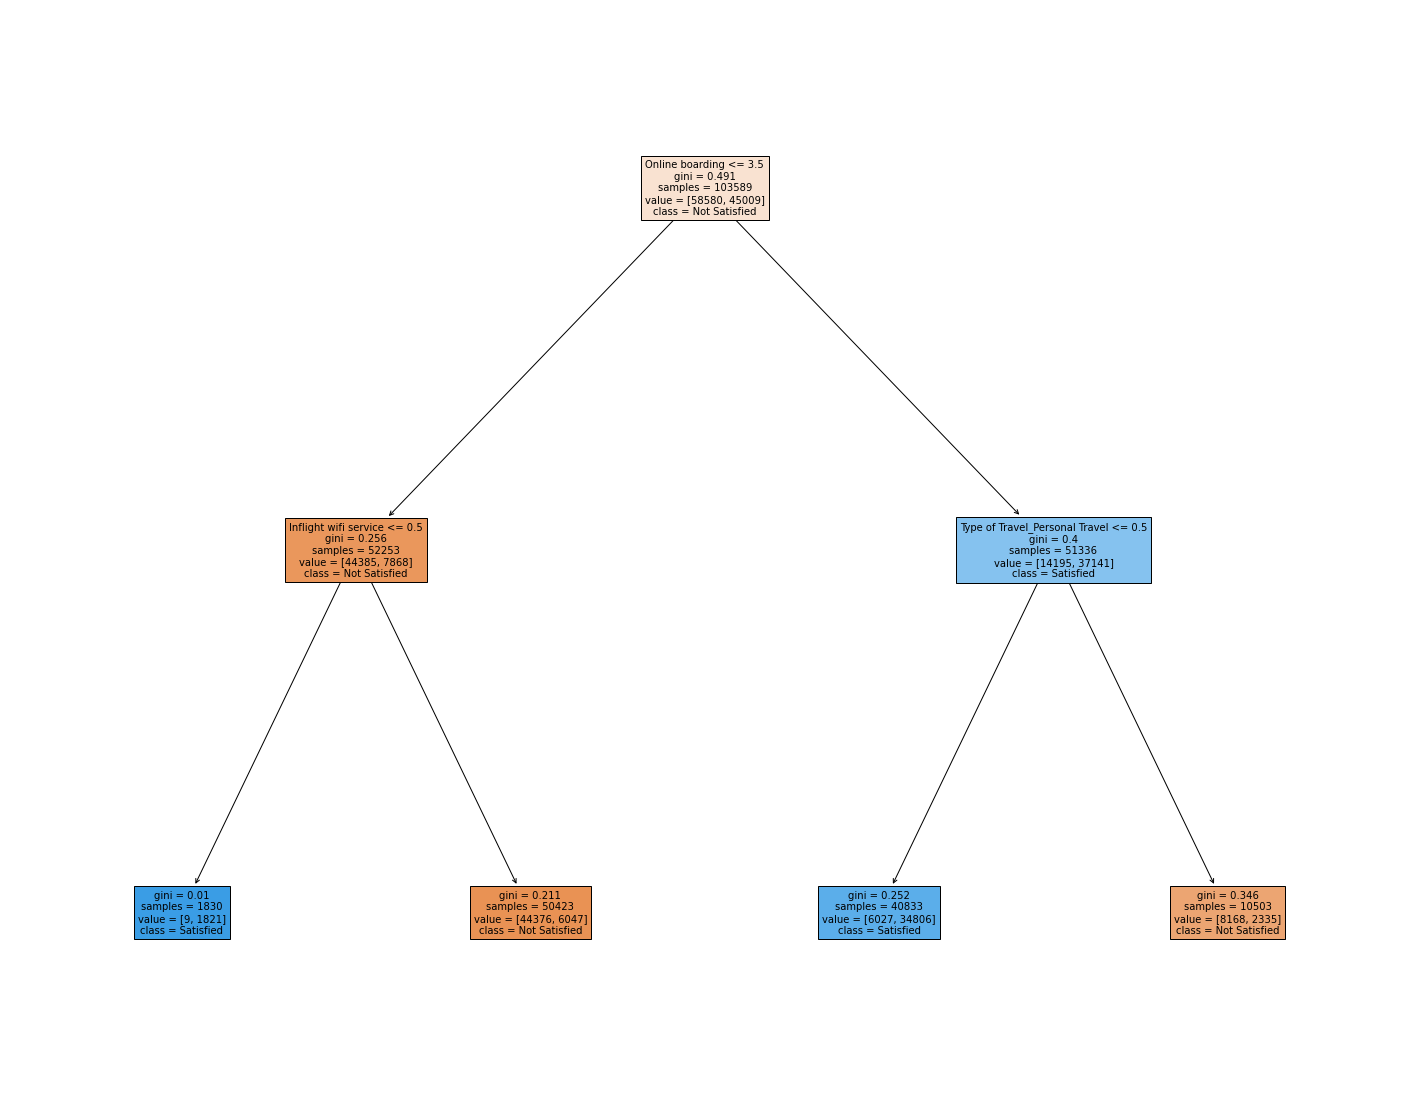

In [115]:
tree_clf = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=4, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0)
tree_clf = tree_clf.fit(x_train, y_train)
y_pred_tree = tree_clf.predict(x_test)
params = {'min_samples_split': [1,2,3,4], 'min_samples_leaf': [1,2,3,4], 'min_weight_fraction_leaf': [-1.0,0.0,1.0], 'max_leaf_nodes': list(range(1,5))}
tree_gsearch = GSearch(DecisionTreeClassifier(max_depth=7), params)
tree_gsearch.fit(x_train, y_train)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_clf,
                   feature_names=input_columns.columns,  
                   class_names=['Not Satisfied','Satisfied'],
                   filled=True, fontsize=10)

print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree))
print("F1 Score:", f1_score(y_test, y_pred_tree))

In [113]:
tree_gsearch.best_params_

{'max_leaf_nodes': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0}

**Decision Tree:**

A decision tree is a graph that classifies items and whether it is true or false to the question in the box. In this example, we use satisfied for true and false for dissatisfied.



P:  0.7256364823277068
A:  0.7518727314850567


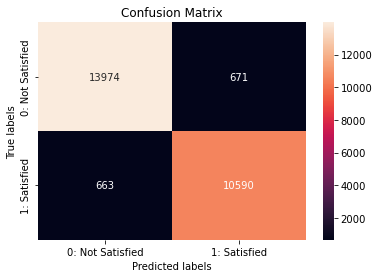

In [83]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0: Not Satisfied', '1: Satisfied',]); ax.yaxis.set_ticklabels(['0: Not Satisfied', '1: Satisfied'])

print("P: ", precision)
print("A: ", accuracy)

a Decision Tree Classifier makes various questions to help determine what group a variable falls into. it goes from the top, and depending on how a question is answered it goes down a path to a different leaf in the tree. It goes all the way down and at the end it puts that variable into a group

- What is a splitting criteron
- What are the pros and cons?
- 



In [16]:
tree_clf = DecisionTreeClassifier()
adc_clf = ADC()

In [17]:
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [18]:
adc_clf.fit(x_train, y_train)

AdaBoostClassifier()

**Adaboost**

Short for adaptive boosting, Adaboost takes combines models together to create the best model possible. It takes a bunch of weak learners and combines them into strong learners. It takes a number of desicion trees during the data training period. As the first model is made the incorrect values are the input for the next model to be made.


In [19]:
adc_pred = adc_clf.predict(x_test)

P:  0.971309578898658
A:  0.9582979380647154


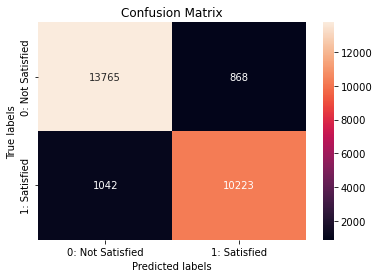

In [20]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, adc_pred), annot=True, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0: Not Satisfied', '1: Satisfied',]); ax.yaxis.set_ticklabels(['0: Not Satisfied', '1: Satisfied'])

print("P: ", precision)
print("A: ", accuracy)

# Sebastian 

In [21]:
total_squared_error = (np.sum((y_test - adc_pred)**2))
mean_squared_error = total_squared_error/len(y_test)
print(mean_squared_error)

0.07375086879295699


In [22]:
lr_clf = LR()

In [23]:
lr_clf.fit(x_train, y_train)

/projects/72aec78b-4035-4aa5-8faa-4d7af1533e7b/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
lr_pred=lr_clf.predict(x_test)

R:  0.7779849090102086
P:  0.7825
A:  0.8093675187273148
F:  0.7802359225461828


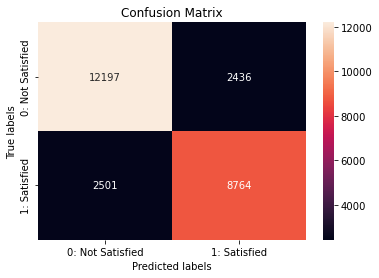

In [25]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0: Not Satisfied', '1: Satisfied',]); ax.yaxis.set_ticklabels(['0: Not Satisfied', '1: Satisfied'])

recall = sklearn.metrics.recall_score(y_test, lr_pred)
precision = sklearn.metrics.precision_score(y_test, lr_pred)
accuracy = sklearn.metrics.accuracy_score(y_test, lr_pred)
f_measure = sklearn.metrics.f1_score(y_test, lr_pred)
print("R: ", recall)
print("P: ", precision)
print("A: ", accuracy)
print("F: ", f_measure)

# Sebastian 

<u>What is a KNN:</u>

A KNN is a classification model and can be used for both supervised and unsupervised machine learning. KNN works by finding the distance between a query and all the examples in the data. K is then used to select the number of examples closest to the query. the KNN then votes for the most frequent label. 

- - [https://towardsdatascience.com/machine\-learning\-basics\-with\-the\-k\-nearest\-neighbors\-algorithm\-6a6e71d01761](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761)
- What does the K mean?
  - [https://towardsdatascience.com/a\-simple\-introduction\-to\-k\-nearest\-neighbors\-algorithm\-b3519ed98e](https://towardsdatascience.com/a-simple-introduction-to-k-nearest-neighbors-algorithm-b3519ed98e)
  - K means a parameter that shows the number of nearest neighbors. This is necessary for the voting process.

Grid search:

[https://scikit\-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

[https://medium.com/@erikgreenj/k\-neighbors\-classifier\-with\-gridsearchcv\-basics\-3c445ddeb657](https://medium.com/@erikgreenj/k-neighbors-classifier-with-gridsearchcv-basics-3c445ddeb657)



In [26]:
knn_clf = KNN(n_neighbors=3,weights='distance')
knn_clf.fit(x_train, y_train)
knn_pred = knn_clf.predict(x_test)

R:  0.6907234798047048
P:  0.7256364823277068
A:  0.7518727314850567
F:  0.7077496816445334


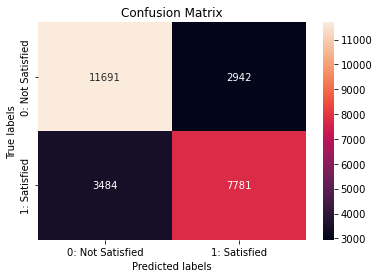

In [29]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0: Not Satisfied', '1: Satisfied',]); ax.yaxis.set_ticklabels(['0: Not Satisfied', '1: Satisfied'])

recall = sklearn.metrics.recall_score(y_test, knn_pred)
precision = sklearn.metrics.precision_score(y_test, knn_pred)
accuracy = sklearn.metrics.accuracy_score(y_test, knn_pred)
f_measure = sklearn.metrics.f1_score(y_test, knn_pred)
print("R: ", recall)
print("P: ", precision)
print("A: ", accuracy)
print("F: ", f_measure)

# Sebastian 

In [0]:
grid_params = {'n_neighbors':[1,2,3], 'weights':[]}

gs = GSearch(KNN(), grid_params)
gs.fit(x_train, y_train)

In [30]:
#svc = SVC(probability=False)

In [31]:
#svc.fit(x_train, y_train)
#svc_pred = svc.pred(x_test, y_test)

<u>Models to make:</u>

- knn
- decision tree
- Random forest
- SVC \(DON'T DO THIS ONE YET\)
- Logistic regression 
- Adaboost 
- 

Scoring me
trics:

- f1 score
- Recall
- Precision 
- Accuracy

